# Importing all the relevant libraries

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import random
import time
import plotly.express as px
import chart_studio.plotly as py
import plotly.offline as po
import plotly.graph_objs as pg

sns.set()

# Getting the data set and analyzing it

In [56]:
data = pd.read_csv("WorldHappiness2019.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [57]:
data.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [58]:
data.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [59]:
newdata = pd.get_dummies(data, drop_first = True)
newdata.head()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Country or region_Albania,Country or region_Algeria,...,Country or region_United Arab Emirates,Country or region_United Kingdom,Country or region_United States,Country or region_Uruguay,Country or region_Uzbekistan,Country or region_Venezuela,Country or region_Vietnam,Country or region_Yemen,Country or region_Zambia,Country or region_Zimbabwe
0,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298,0,0,...,0,0,0,0,0,0,0,0,0,0


it took  1.896141529083252 seconds to create the map


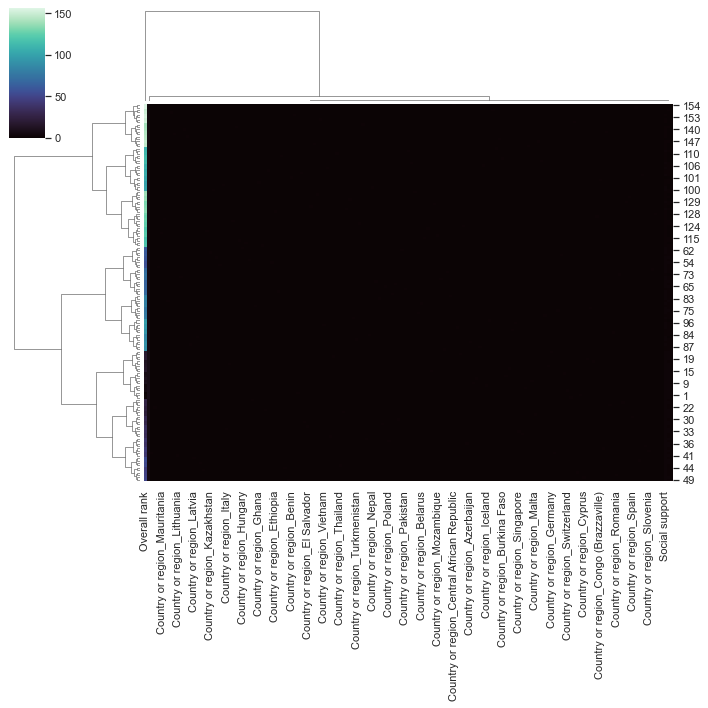

In [60]:
t0 = time.time()
sns.clustermap(newdata, cmap='mako')
timetakentoexec = time.time()-t0
print("it took ", timetakentoexec, "seconds to create the map")

## Creating the world map to populate our data with

In [61]:
po.init_notebook_mode(connected = True)

In [62]:
temp = data.drop(columns = ['Country or region'], axis = 1)

mapdata = dict(type = "choropleth", 
    locations =  data['Country or region'],
    locationmode = "country names" ,
    z = data['Score'], 
    text= data['Country or region']
)

# Analysing Happiness in 2019

In [63]:
layout = dict(title = 'World Happiness Index Report Based on Score', 
    geo = dict(showlakes = True, 
        lakecolor = 'rgb(0,191,255)'
    )
)

t1 = time.time()
x = pg.Figure(data = [mapdata], layout = layout)
po.iplot(x)
timemap = time.time()-t1
print("it took ", timemap, "seconds to create the map")

it took  0.10398674011230469 seconds to create the map


In [64]:
mapdata = dict(type = "choropleth", 
    locations =  data['Country or region'],
    locationmode = "country names" ,
    z = data['GDP per capita'], 
    text= data['Country or region']
)

layout = dict(title = 'World Happiness Index Report Based on GDP Per Capita', 
    geo = dict(showlakes = True, 
        lakecolor = 'rgb(0,191,255)'
    )
)

t1 = time.time()
x = pg.Figure(data = [mapdata], layout = layout)
po.iplot(x)
timemap = time.time()-t1
print("it took ", timemap, "seconds to create the map")

it took  0.10802054405212402 seconds to create the map


In [65]:
mapdata = dict(type = "choropleth", 
    locations =  data['Country or region'],
    locationmode = "country names" ,
    z = data['Social support'], 
    text= data['Country or region']
)

layout = dict(title = 'World Happiness Index Report Based on Social support', 
    geo = dict(showlakes = True, 
        lakecolor = 'rgb(0,191,255)'
    )
)

t1 = time.time()
x = pg.Figure(data = [mapdata], layout = layout)
po.iplot(x)
timemap = time.time()-t1
print("it took ", timemap, "seconds to create the map")

it took  0.09299874305725098 seconds to create the map


In [66]:
mapdata = dict(type = "choropleth", 
    locations =  data['Country or region'],
    locationmode = "country names" ,
    z = data['Healthy life expectancy'], 
    text= data['Country or region']
)

layout = dict(title = 'World Happiness Index Report Based on Healthy life expectancy', 
    geo = dict(showlakes = True, 
        lakecolor = 'rgb(0,191,255)'
    )
)

t1 = time.time()
x = pg.Figure(data = [mapdata], layout = layout)
po.iplot(x)
timemap = time.time()-t1
print("it took ", timemap, "seconds to create the map")

it took  0.07400035858154297 seconds to create the map


In [67]:
mapdata = dict(type = "choropleth", 
    locations =  data['Country or region'],
    locationmode = "country names" ,
    z = data['Freedom to make life choices'], 
    text= data['Country or region']
)

layout = dict(title = 'World Happiness Index Report Based on Freedom to make life choices', 
    geo = dict(showlakes = True, 
        lakecolor = 'rgb(0,191,255)'
    )
)

t1 = time.time()
x = pg.Figure(data = [mapdata], layout = layout)
po.iplot(x)
timemap = time.time()-t1
print("it took ", timemap, "seconds to create the map")

it took  0.07691383361816406 seconds to create the map


In [68]:
mapdata = dict(type = "choropleth", 
    locations =  data['Country or region'],
    locationmode = "country names" ,
    z = data['Generosity'], 
    text= data['Country or region']
)

layout = dict(title = 'World Happiness Index Report Based on Generosity', 
    geo = dict(showlakes = True, 
        lakecolor = 'rgb(0,191,255)'
    )
)

t1 = time.time()
x = pg.Figure(data = [mapdata], layout = layout)
po.iplot(x)
timemap = time.time()-t1
print("it took ", timemap, "seconds to create the map")

it took  0.06499838829040527 seconds to create the map


In [69]:
mapdata = dict(type = "choropleth", 
    locations =  data['Country or region'],
    locationmode = "country names" ,
    z = data['Perceptions of corruption'], 
    text= data['Country or region']
)

layout = dict(title = 'World Happiness Index Report Based on Perceptions of corruption', 
    geo = dict(showlakes = True, 
        lakecolor = 'rgb(0,191,255)'
    )
)

t1 = time.time()
x = pg.Figure(data = [mapdata], layout = layout)
po.iplot(x)
timemap = time.time()-t1
print("it took ", timemap, "seconds to create the map")

it took  0.09599709510803223 seconds to create the map


# Analysing Happiness in 2018

In [70]:
data18 = pd.read_csv("2018.csv")
data18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     155 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [71]:
data18.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000
mean,78.500000,5.375917,0.891449,1.213237,0.597346,0.454506,0.181006,0.112000
std,45.177428,1.119506,0.391921,0.302372,0.247579,0.162424,0.098471,0.096492
min,1.000000,2.905000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.453750,0.616250,1.066750,0.422250,0.356000,0.109500,0.051000
50%,78.500000,5.378000,0.949500,1.255000,0.644000,0.487000,0.174000,0.082000
75%,117.250000,6.168500,1.197750,1.463000,0.777250,0.578500,0.239000,0.137000
max,156.000000,7.632000,2.096000,1.644000,1.030000,0.724000,0.598000,0.457000


In [72]:
mapdata = dict(type = "choropleth", 
    locations =  data18['Country or region'],
    locationmode = "country names" ,
    z = data18['GDP per capita'], 
    text= data18['Country or region']
)

layout = dict(title = 'World Happiness Index Report Based on GDP Per Capita', 
    geo = dict(showlakes = True, 
        lakecolor = 'rgb(0,191,255)'
    )
)

t1 = time.time()
x = pg.Figure(data = [mapdata], layout = layout)
po.iplot(x)
timemap = time.time()-t1
print("it took ", timemap, "seconds to create the map")

it took  0.1155393123626709 seconds to create the map


In [73]:
mapdata = dict(type = "choropleth", 
    locations =  data18['Country or region'],
    locationmode = "country names" ,
    z = data18['Perceptions of corruption'], 
    text= data18['Country or region']
)

layout = dict(title = 'World Happiness Index Report Based on Perceptions of corruption', 
    geo = dict(showlakes = True, 
        lakecolor = 'rgb(0,191,255)'
    )
)

t1 = time.time()
x = pg.Figure(data = [mapdata], layout = layout)
po.iplot(x)
timemap = time.time()-t1
print("it took ", timemap, "seconds to create the map")

it took  0.09199833869934082 seconds to create the map


In [74]:
mapdata = dict(type = "choropleth", 
    locations =  data18['Country or region'],
    locationmode = "country names" ,
    z = data18['Score'], 
    text= data18['Country or region']
)

layout = dict(title = 'World Happiness Index Report Based on Score', 
    geo = dict(showlakes = True, 
        lakecolor = 'rgb(0,191,255)'
    )
)

t1 = time.time()
x = pg.Figure(data = [mapdata], layout = layout)
po.iplot(x)
timemap = time.time()-t1
print("it took ", timemap, "seconds to create the map")

it took  0.05398869514465332 seconds to create the map


In [75]:
mapdata = dict(type = "choropleth", 
    locations =  data18['Country or region'],
    locationmode = "country names" ,
    z = data18['Social support'], 
    text= data18['Country or region']
)

layout = dict(title = 'World Happiness Index Report Based on Social support', 
    geo = dict(showlakes = True, 
        lakecolor = 'rgb(0,191,255)'
    )
)

t1 = time.time()
x = pg.Figure(data = [mapdata], layout = layout)
po.iplot(x)
timemap = time.time()-t1
print("it took ", timemap, "seconds to create the map")

it took  0.08299756050109863 seconds to create the map


In [76]:
mapdata = dict(type = "choropleth", 
    locations =  data18['Country or region'],
    locationmode = "country names" ,
    z = data18['Healthy life expectancy'], 
    text= data18['Country or region']
)

layout = dict(title = 'World Happiness Index Report Based on Healthy life expectancy', 
    geo = dict(showlakes = True, 
        lakecolor = 'rgb(0,191,255)'
    )
)

t1 = time.time()
x = pg.Figure(data = [mapdata], layout = layout)
po.iplot(x)
timemap = time.time()-t1
print("it took ", timemap, "seconds to create the map")

it took  0.13298678398132324 seconds to create the map


In [77]:
mapdata = dict(type = "choropleth", 
    locations =  data18['Country or region'],
    locationmode = "country names" ,
    z = data18['Freedom to make life choices'], 
    text= data18['Country or region']
)

layout = dict(title = 'World Happiness Index Report Based on Freedom to make life choices', 
    geo = dict(showlakes = True, 
        lakecolor = 'rgb(0,191,255)'
    )
)

t1 = time.time()
x = pg.Figure(data = [mapdata], layout = layout)
po.iplot(x)
timemap = time.time()-t1
print("it took ", timemap, "seconds to create the map")

it took  0.0729975700378418 seconds to create the map


In [78]:
mapdata = dict(type = "choropleth", 
    locations =  data18['Country or region'],
    locationmode = "country names" ,
    z = data18['Generosity'], 
    text= data18['Country or region']
)

layout = dict(title = 'World Happiness Index Report Based on Generosity', 
    geo = dict(showlakes = True, 
        lakecolor = 'rgb(0,191,255)'
    )
)

t1 = time.time()
x = pg.Figure(data = [mapdata], layout = layout)
po.iplot(x)
timemap = time.time()-t1
print("it took ", timemap, "seconds to create the map")

it took  0.07799077033996582 seconds to create the map


# Analysing Happiness in 2017

In [79]:
data17 = pd.read_csv("2017.csv")
data17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

In [80]:
data17.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [81]:
for x in range(data17.shape[1]):
    if data17.columns[x]!= "Country":
        mapdata = dict(type = "choropleth", 
            locations =  data17['Country'],
            locationmode = "country names" ,
            z = data17[data17.columns[x]], 
            text= data17['Country']
        )

        layout = dict(title = 'World Happiness Index Report Based on {}'.format(data17.columns[x]), 
            geo = dict(showlakes = True, 
                lakecolor = 'rgb(0,191,255)'
            )
        )

        x = pg.Figure(data = [mapdata], layout = layout)
        po.iplot(x)

# Analysing Happiness in 2016

In [82]:
data16raw = pd.read_csv("2016.csv")
data16raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

In [83]:
data16raw.describe()


,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,78.980892,5.382185,5.282395,5.481975,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807
std,45.466030,1.141674,1.148043,1.136493,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,0.542220
min,1.000000,2.905000,2.732000,3.078000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890
25%,40.000000,4.404000,4.327000,4.465000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,2.031710
50%,79.000000,5.314000,5.237000,5.419000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,2.290740
75%,118.000000,6.269000,6.154000,6.434000,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,2.664650
max,157.000000,7.526000,7.460000,7.669000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,3.837720


In [84]:
data16 = data16raw.drop(columns = "Region", axis = 1)

In [85]:
data16.head()

,Country,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [86]:
for x in range(data16.shape[1]):
    if data16.columns[x]!= "Country":
        mapdata = dict(type = "choropleth", 
            locations =  data16['Country'],
            locationmode = "country names" ,
            z = data16[data16.columns[x]], 
            text= data16['Country']
        )

        layout = dict(title = 'World Happiness Index Report Based on {}'.format(data16.columns[x]), 
            geo = dict(showlakes = True, 
                lakecolor = 'rgb(0,191,255)'
            )
        )

        x = pg.Figure(data = [mapdata], layout = layout)
        po.iplot(x)

# Analyzing Happpiness in 2015

In [87]:
data15 = pd.read_csv("2015.csv")
data15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [88]:
data15.drop(columns= ["Region"], axis = 1, inplace = True)
data15.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [89]:
data15.head()

,Country,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [90]:
for x in range(data15.shape[1]):
    if data15.columns[x]!= "Country":
        mapdata = dict(type = "choropleth", 
            locations =  data15['Country'],
            locationmode = "country names" ,
            z = data15[data15.columns[x]], 
            text= data15['Country']
        )

        layout = dict(title = 'World Happiness Index Report Based on {}'.format(data15.columns[x]), 
            geo = dict(showlakes = True, 
                lakecolor = 'rgb(0,191,255)'
            )
        )

        x = pg.Figure(data = [mapdata], layout = layout)
        po.iplot(x)